In [1]:
import tensorflow.compat.v1 as tf
import lucid_kietzmannlab.modelzoo.vision_models as models
from ipywidgets import interact, Dropdown, IntSlider
from lucid_kietzmannlab.utils import plot_images
tf.compat.v1.disable_eager_execution()


In [2]:
model_dir="/Users/vkapoor/Downloads/models/AlexNet/training_seed_05"
random_seed = 5
model = models.AlexNetCodeOcean(model_dir=model_dir, random_seed = random_seed)


loaded_images (1, 224, 224, 3)


/Users/vkapoor/miniconda3/envs/lucidenv/lib/python3.12/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [5]:
layer_shape_dict = model.layer_shape_dict
def visualize(layer_name, channel):
    model.vis_layer = layer_name
    model.channel = channel
    image_channel = model.lucid_visualize_layer()
    
    
def visualize_all(channel_start = 0, channel_end = 10):
    layer_name = current_dropdown_value({'new': layer_dropdown.value})
    model.vis_layer = layer_name
    image_channel = model.lucid_visualize_layer(batch = True, channel_start = channel_start, channel_end = channel_end)
    return image_channel              
                              

        
# Create dropdown menu for layer selection
layer_dropdown = Dropdown(options=list(layer_shape_dict.keys()), description='Layer:')

# Create slider for channel selection
channel_slider = IntSlider(min=0, max=0, description='Channel:')
        
        
def update_channel_slider(change):
    layer_name = change.new
    if layer_name in layer_shape_dict:
        
        max_channel = layer_shape_dict[layer_name][-1] - 1
        channel_slider.max = max_channel
        
        
def current_slider_value(*args):
    return channel_slider.value


def current_dropdown_value(change):
    return change['new']


channel_slider.observe(current_slider_value, names='value')
layer_dropdown.observe(current_dropdown_value, names='value')
        

       

In [6]:
layer_dropdown.observe(update_channel_slider, names='value')

# Create an interactive visualization
interact(visualize, layer_name=layer_dropdown, channel=channel_slider)     

interactive(children=(Dropdown(description='Layer:', options=('alexnet_v2/conv1/Conv2D', 'alexnet_v2/conv2/Con…

<function __main__.visualize(layer_name, channel)>

In [7]:
image_channel = visualize_all(channel_start = 0, channel_end = 10)

loaded_images (1, 224, 224, 3)
INFO:tensorflow:Restoring parameters from /Users/vkapoor/Downloads/models/AlexNet/training_seed_05/model.ckpt_epoch89


100%|██████████| 10/10 [06:24<00:00, 38.44s/it]


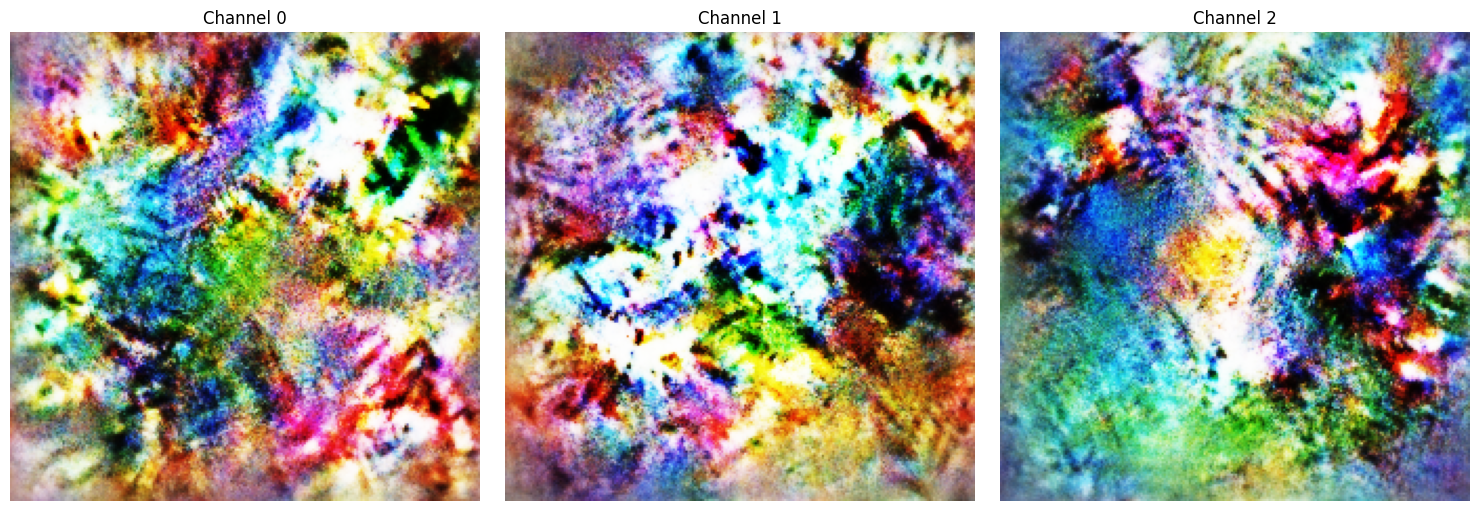

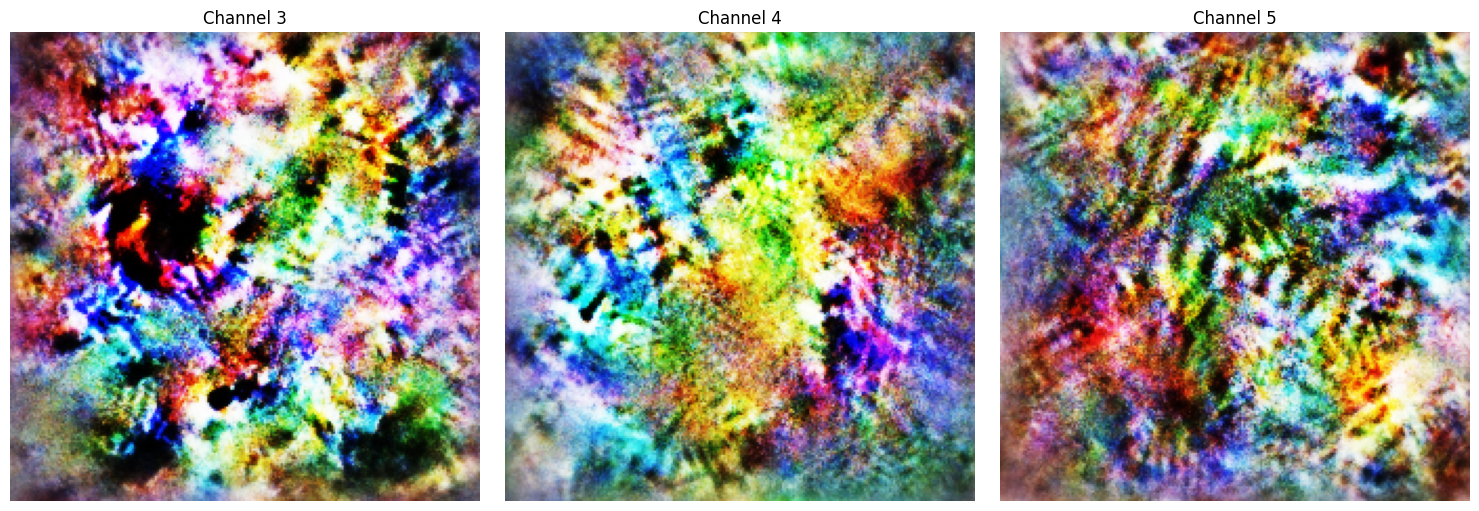

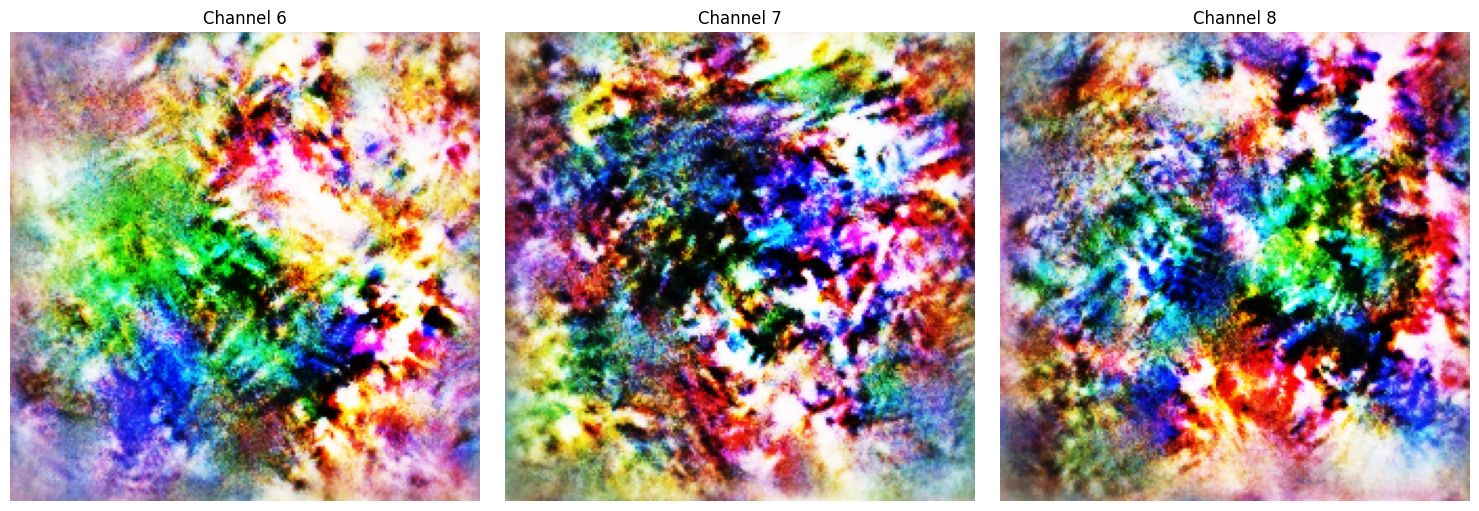

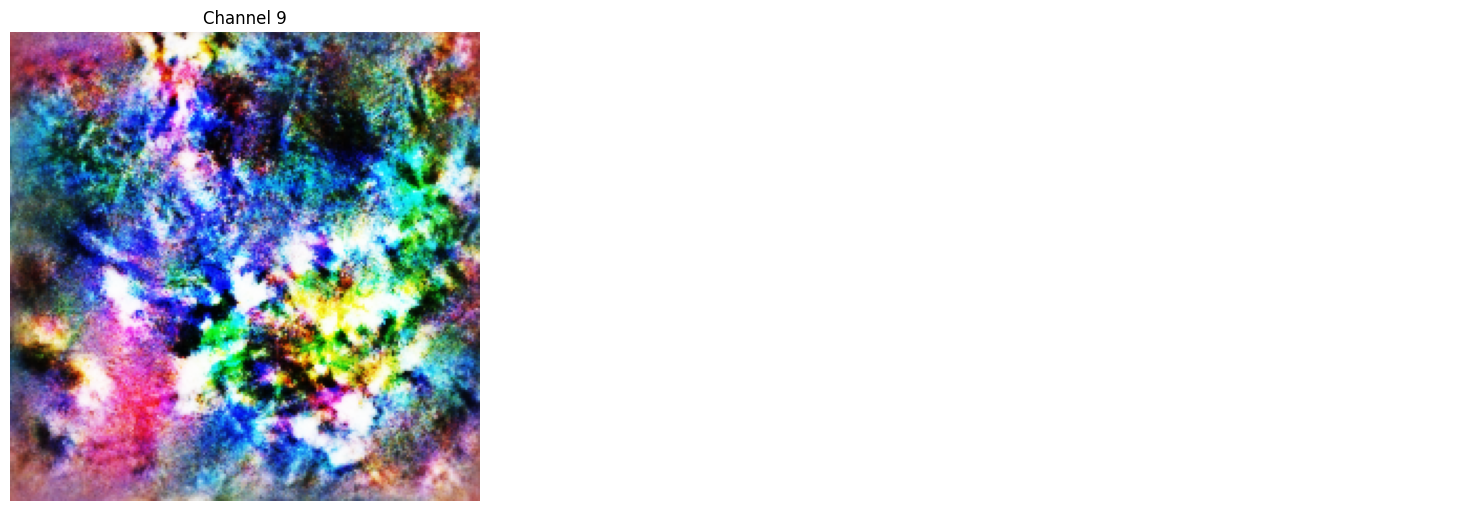

In [8]:

if image_channel:
    plot_images(image_channel)   